In [1]:
import numpy as np
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['ps.useafm']=True
matplotlib.rcParams['pdf.use14corefonts']=True
matplotlib.rcParams['text.usetex']=True

import seaborn as sns
sns.set(font_scale=2)
sns.set_style("whitegrid", {'axes.edgecolor': '.1', 'grid.color': '.1', 'grid.linestyle': '--'})

In [2]:
N_train = 200
N_trial = 10

n = 500
sigmas = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0]

dir_res_dic = {}
for dir_name in ['Packing', 'Maxflow', 'Mincostflow']:
    m = 50 if dir_name == 'Packing' else 1000
    # Define paths
    dir_name_synth = [dir_name for _ in sigmas]
    dir_names = dir_name_synth

    data_paths = [
        f'data/{dir_name}/m{m}_n{n}_vsigma{sigma}.npz' for dir_name, sigma in zip(dir_name_synth, sigmas)
    ]
    
    result_paths = [
        f'result/{dir_name}/m{m}_n{n}_vsigma{sigma}_multi_sigma_N_train{N_train}.pkl' for dir_name, sigma in zip(dir_name_synth, sigmas)
    ]
    dir_res_dic[dir_name] = result_paths

# Define plot parameters
color_dict = {"full": "#636363", "random": "darkolivegreen", "pca": "#1f77b4", "sgd": "#ff7f0e"}
label_order = ['full', 'random', 'pca', 'sgd']
label_dict = {"full": r"\textsf{Full}", "random": r"\textsf{ColRand}", "pca": r"\textsf{PCA}", "sgd": r"\textsf{SGA}"}

In [3]:
plot_df_dic = {}
for dir_name in ['Packing', 'Maxflow', 'Mincostflow']:
    result_paths = dir_res_dic[dir_name]

    df = pd.DataFrame(columns=['sigma','method', 'trial', 'k', 'objective_value', 'time_solver', 'time_projection', 'time_retrieval', 'violation_Ab', 'violation_NN', 'objective_value_ratio'])
    for i in range(len(sigmas)):
        sigma = sigmas[i]
        dftmp = pd.read_pickle(result_paths[i])  
        #dftmp = dftmp[dftmp['k'] == 20]
        dftmp['sigma'] = sigma
        dftmp['objective_value_ratio'] = dftmp['objective_value'] / np.tile(dftmp[dftmp['method'] == 'full']['objective_value'].values, len(dftmp)//len(dftmp[dftmp['method'] == 'full']))
        df = pd.concat([df, dftmp], axis=0)

    plot_df = df.groupby(['method', 'sigma', 'trial']).mean().reset_index()
    plot_df_dic[dir_name] = plot_df

/var/folders/dx/jqclx98137d089kylj7hq6_40000gn/T/ipykernel_28753/2277573147.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, dftmp], axis=0)
/var/folders/dx/jqclx98137d089kylj7hq6_40000gn/T/ipykernel_28753/2277573147.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, dftmp], axis=0)
/var/folders/dx/jqclx98137d089kylj7hq6_40000gn/T/ipykernel_28753/2277573147.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is 

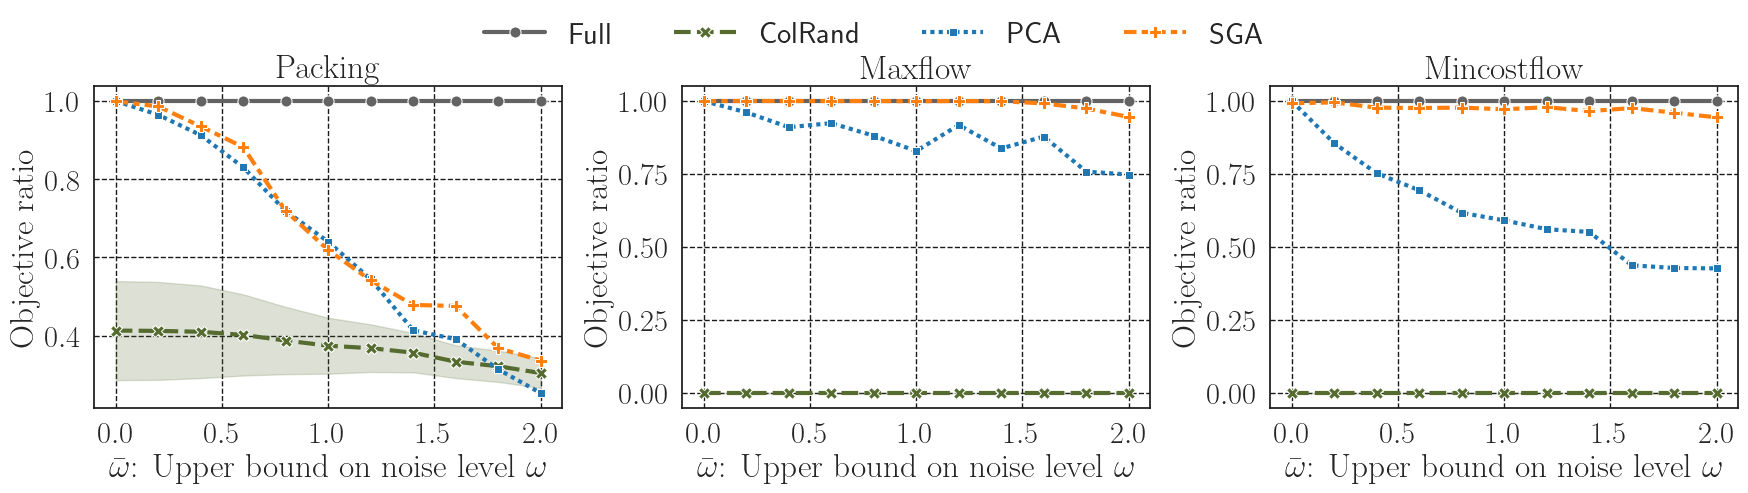

In [4]:
# Create 4x4 subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

for i, dir_name in enumerate(['Packing', 'Maxflow', 'Mincostflow']):
    plot_df = plot_df_dic[dir_name]

    # Plot k vs. objective_value_ratio
    ax = axs[i]

    sns.lineplot(data=plot_df, x='sigma', y='objective_value_ratio', hue='method', hue_order=label_order, style='method', style_order=label_order, errorbar='sd', err_style='band', palette=color_dict, markers=True, dashes=True, ax=ax, linewidth=3, markersize=8)
    ax.set_xlabel(r'\rm $\bar \omega$: Upper bound on noise level $\omega$')
    ax.set_ylabel(r'\rm Objective ratio')
    ax.set_title(fr"\rm {dir_name}") 
    #show
    


    # Edit labels
    handles, labels = ax.get_legend_handles_labels()
    labels = [label_dict[label] for label in label_order]
    
    # Remove the legend
    ax.get_legend().remove()

# Set the legend for the entire figure
legend = fig.legend(handles, labels, loc='upper center', ncol=4, bbox_to_anchor=(0.5, 1.05), frameon=False)


plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
#plt.show()
#plt.savefig('plot_result.pdf', bbox_inches='tight')
plt.savefig('plot_result_vsigma.pdf', bbox_inches='tight')